### Table of contents

1. Importing libraries and data  
2. Wrangling and cleaning data
3. Time-series analysis
Decomposition  
4. Testing for ststionarity
Dickey-Fuller test  
Autocorrelation

#### 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import matplotlib.pyplot as plt
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
from folium.features import GeoJsonPopup, GeoJsonTooltip
import folium 
import json
import geopandas as gpd

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Define path
path = r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\WorldHappinessReport\Visualizations'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path,'Happiness2015-2023.csv'), index_col = False)
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy


In [4]:
# Drop coulumn 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

#### 2. Wrangling and cleaning data

**Germany**

In [5]:
# Create a subset 
sub = df[df['country'] == 'Germany'][['year', 'happiness_score']]
sub

,year,happiness_score
25,2015,6.7500
173,2016,6.9940
330,2017,6.9510
484,2018,6.9650
642,2019,6.9850
798,2020,7.0758
947,2021,7.1550
1097,2022,7.0340
1245,2023,6.8920


In [6]:
# Reset the index
sub = sub.reset_index()
sub

,index,year,happiness_score
0,25,2015,6.7500
1,173,2016,6.9940
2,330,2017,6.9510
3,484,2018,6.9650
4,642,2019,6.9850
5,798,2020,7.0758
6,947,2021,7.1550
7,1097,2022,7.0340
8,1245,2023,6.8920


In [7]:
# Set column 'Year' as an index
sub = sub.set_index('year')

In [8]:
# Drop unnecessary columns
sub = sub.drop(columns = ['index'])
sub

,happiness_score
year,
2015,6.7500
2016,6.9940
2017,6.9510
2018,6.9650
2019,6.9850
2020,7.0758
2021,7.1550
2022,7.0340
2023,6.8920


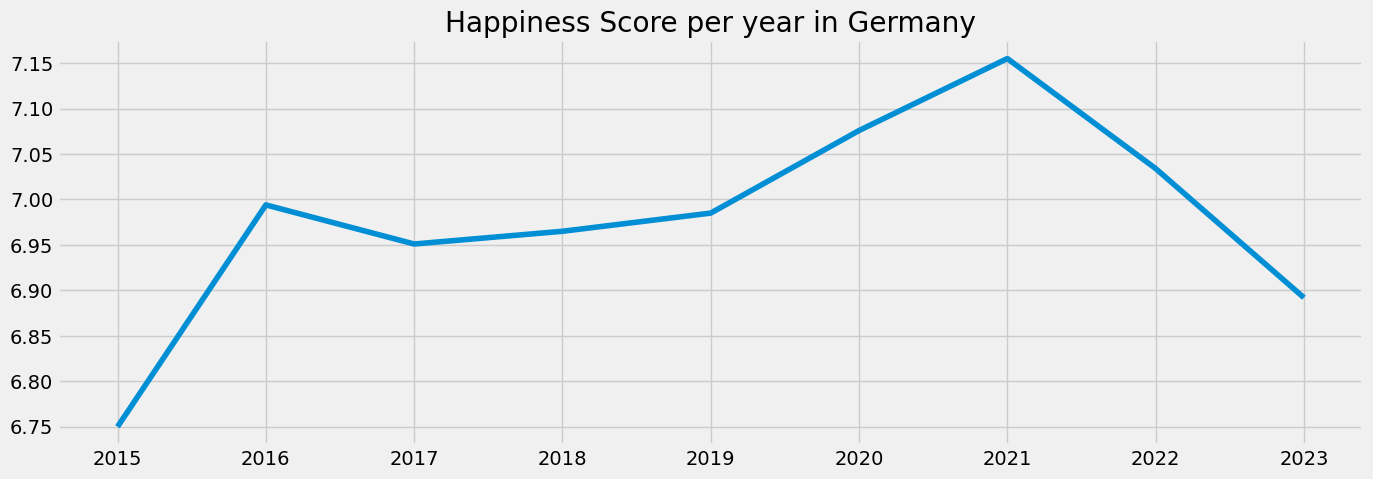

In [9]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub)
plt.title('Happiness Score per year in Germany')
plt.savefig(os.path.join(path1, 'Germany_HappinessScore'),bbox_inches='tight', pad_inches=0.1)

**Romania**

In [10]:
# Create a subset 
sub1 = df[df['country'] == 'Romania'][['year', 'happiness_score']]
sub1

,year,happiness_score
85,2015,5.1240
228,2016,5.5280
371,2017,5.8250
521,2018,5.9450
673,2019,6.0700
828,2020,6.1237
980,2021,6.1400
1111,2022,6.4770
1253,2023,6.5890


In [11]:
# Reset the index
sub1 = sub1.reset_index()
sub1

,index,year,happiness_score
0,85,2015,5.1240
1,228,2016,5.5280
2,371,2017,5.8250
3,521,2018,5.9450
4,673,2019,6.0700
5,828,2020,6.1237
6,980,2021,6.1400
7,1111,2022,6.4770
8,1253,2023,6.5890


In [12]:
# Set column 'Year' as an index
sub1 = sub1.set_index('year')

In [13]:
# Drop unnecessary columns
sub1 = sub1.drop(columns = ['index'])
sub1

,happiness_score
year,
2015,5.1240
2016,5.5280
2017,5.8250
2018,5.9450
2019,6.0700
2020,6.1237
2021,6.1400
2022,6.4770
2023,6.5890


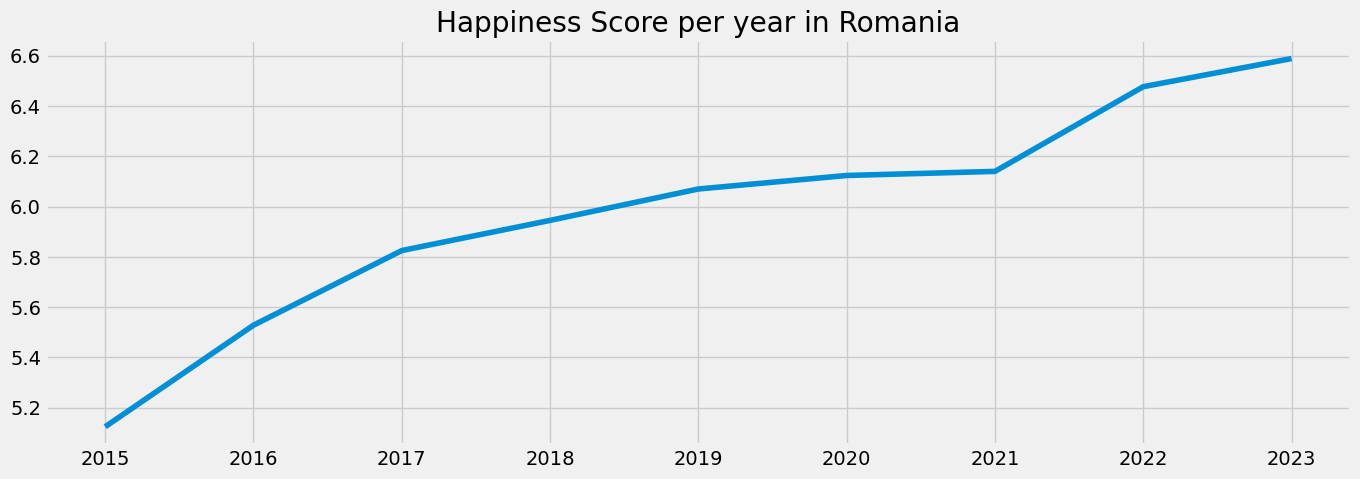

In [14]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub1)
plt.title('Happiness Score per year in Romania')
plt.savefig(os.path.join(path1, 'Romania_HappinessScore'),bbox_inches='tight', pad_inches=0.1)

#### 3. Time-series analysis: decomposition

**Germany**

In [15]:
# Decompose the time series using an 'additative' model
decomposition = sm.tsa.seasonal_decompose(sub, model = 'additative', period=1)

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

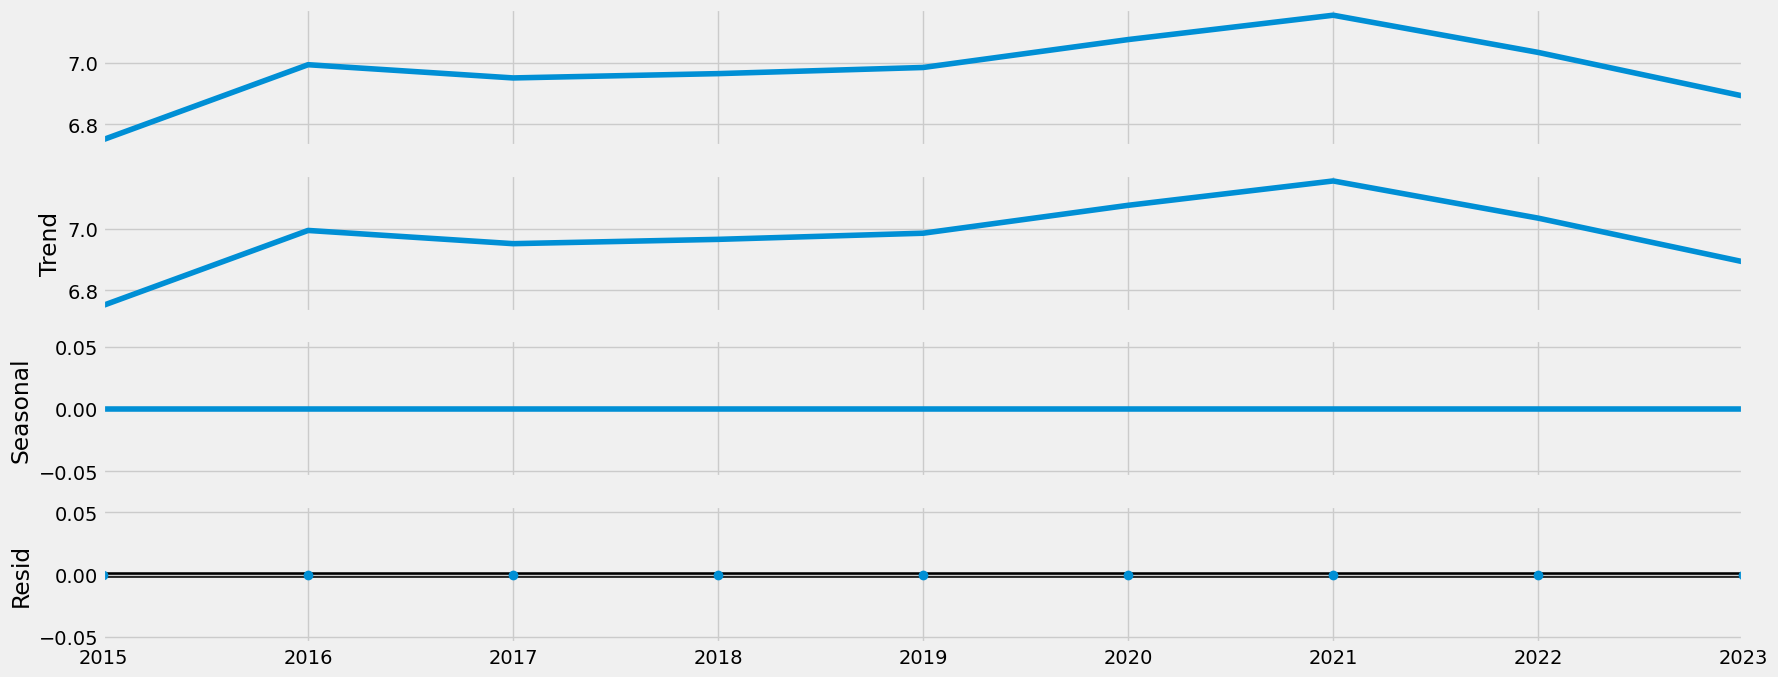

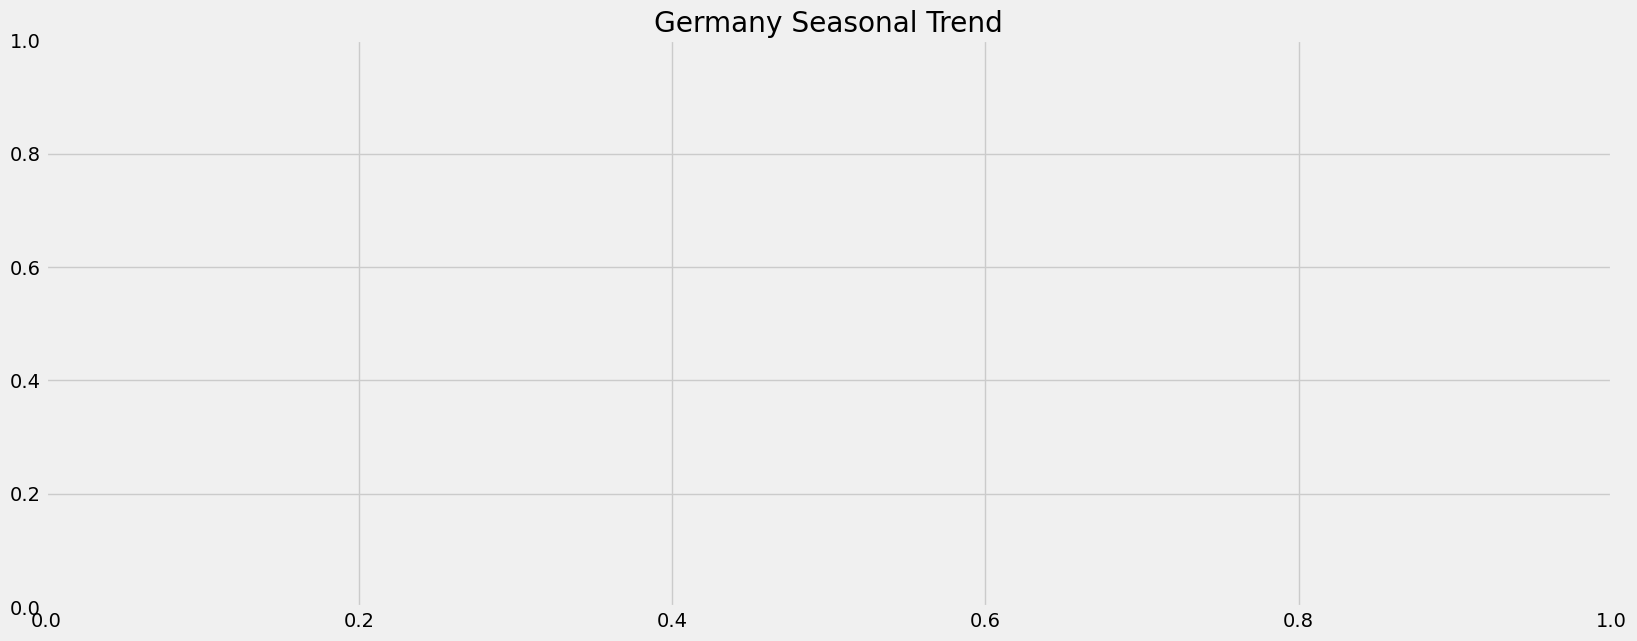

In [17]:
# Plot the separate components
decomposition.plot()
plt.show()
plt.title('Germany Seasonal Trend')
plt.savefig(os.path.join(path1, 'Germany_Trend'),bbox_inches='tight', pad_inches=0.1)

**Romania**

In [18]:
# Decompose the time series using an 'additative' model
decomposition = sm.tsa.seasonal_decompose(sub1, model = 'additative', period=1)

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

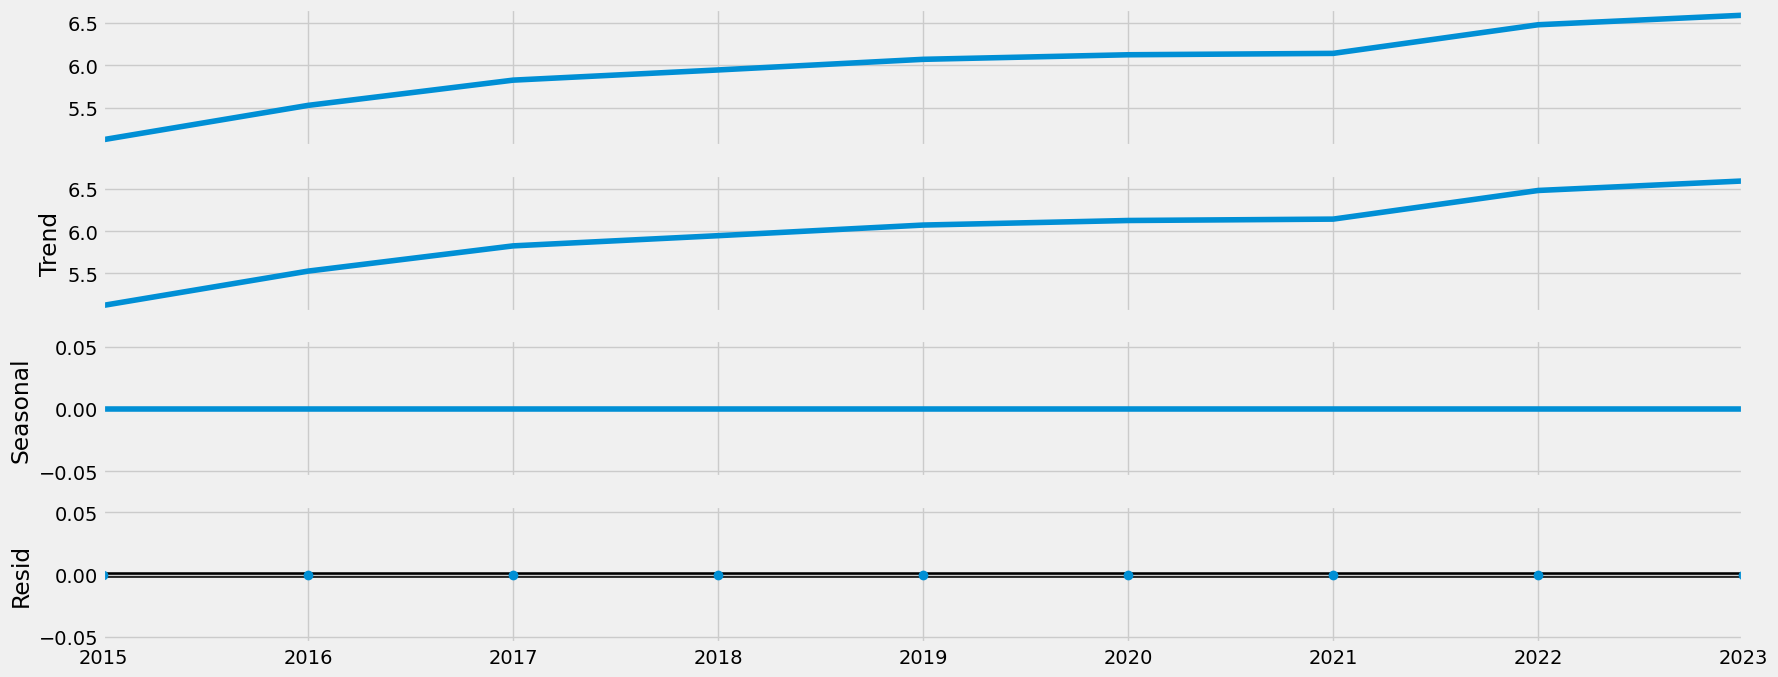

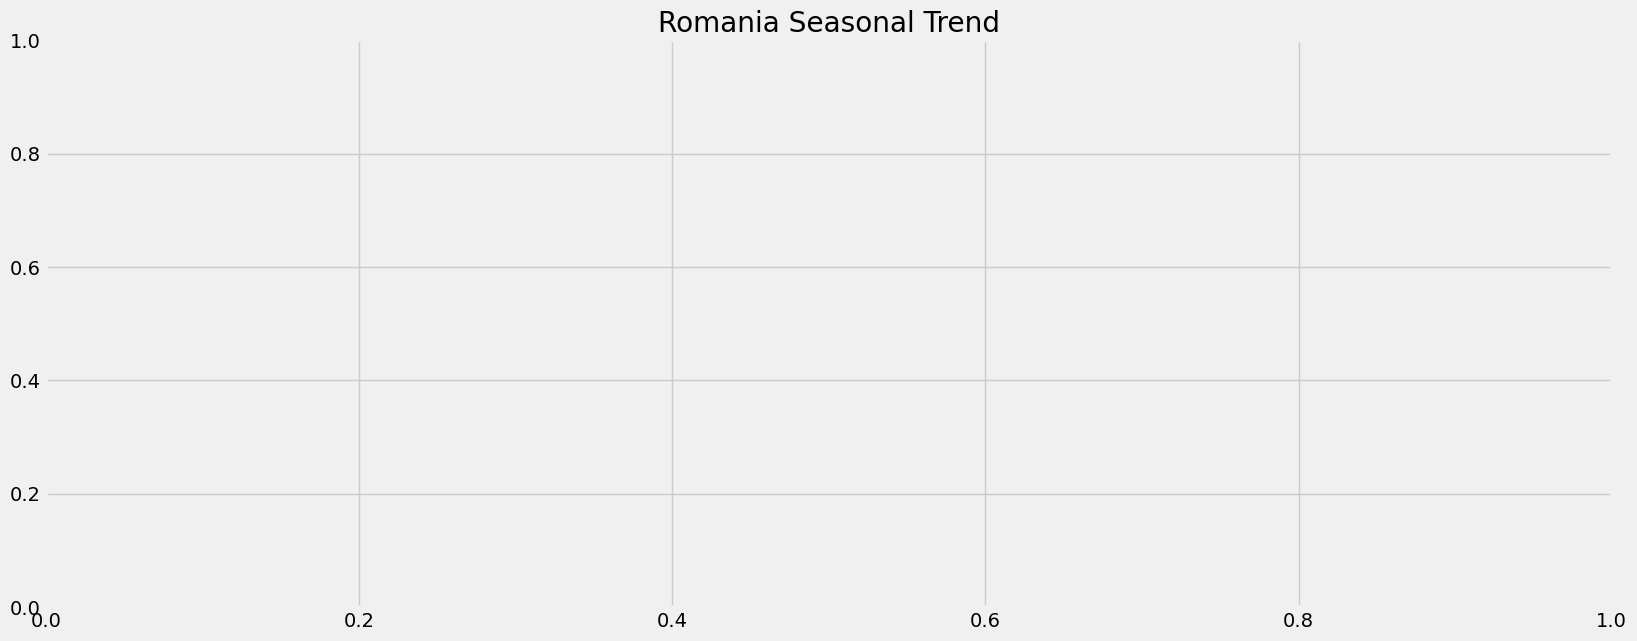

In [20]:
# Plot the separate components
decomposition.plot()
plt.show()
plt.title('Romania Seasonal Trend')
plt.savefig(os.path.join(path1, 'Romania_Trend'),bbox_inches='tight', pad_inches=0.1)

#### 4. Testing for stationarity

**Germany**

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.117117
p-value                        0.708198
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


**Romania**

In [22]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub1['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.155016
p-value                        0.222975
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### Autocorrelation

**Germany**

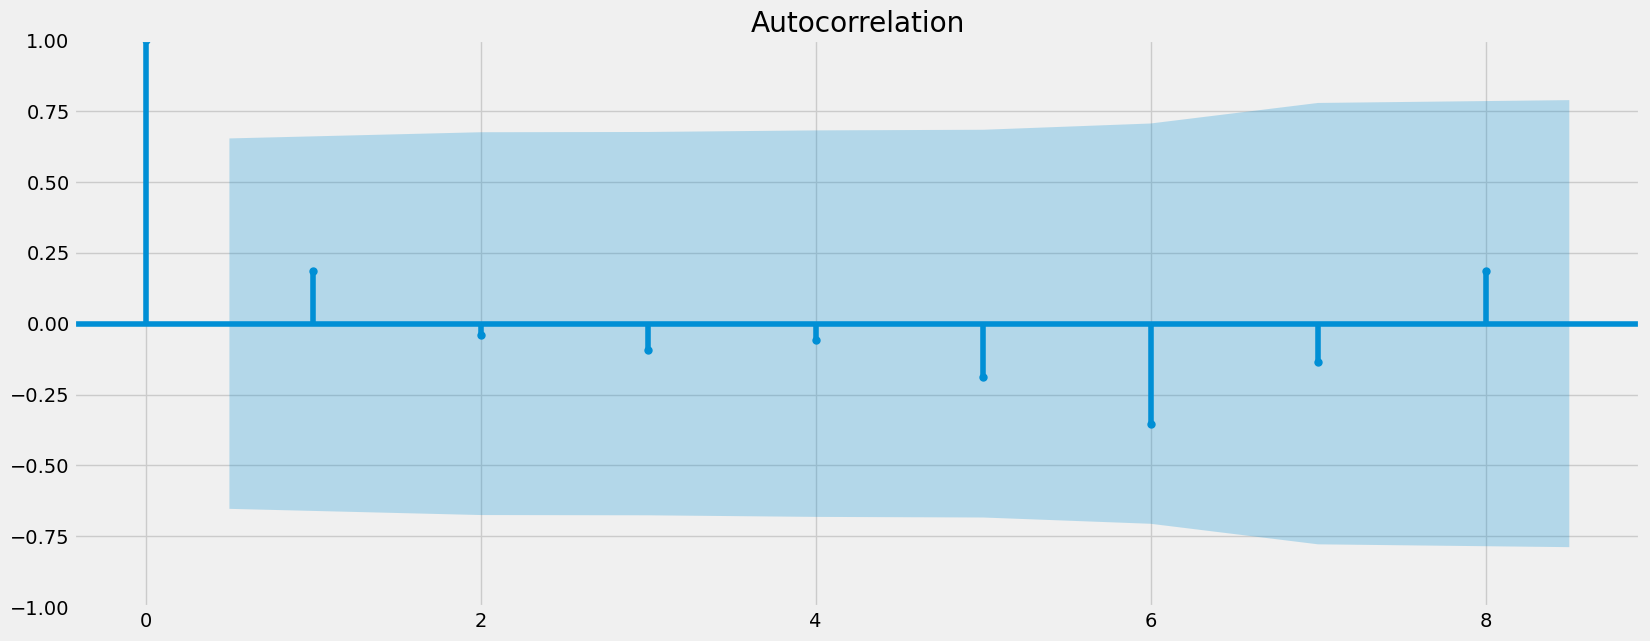

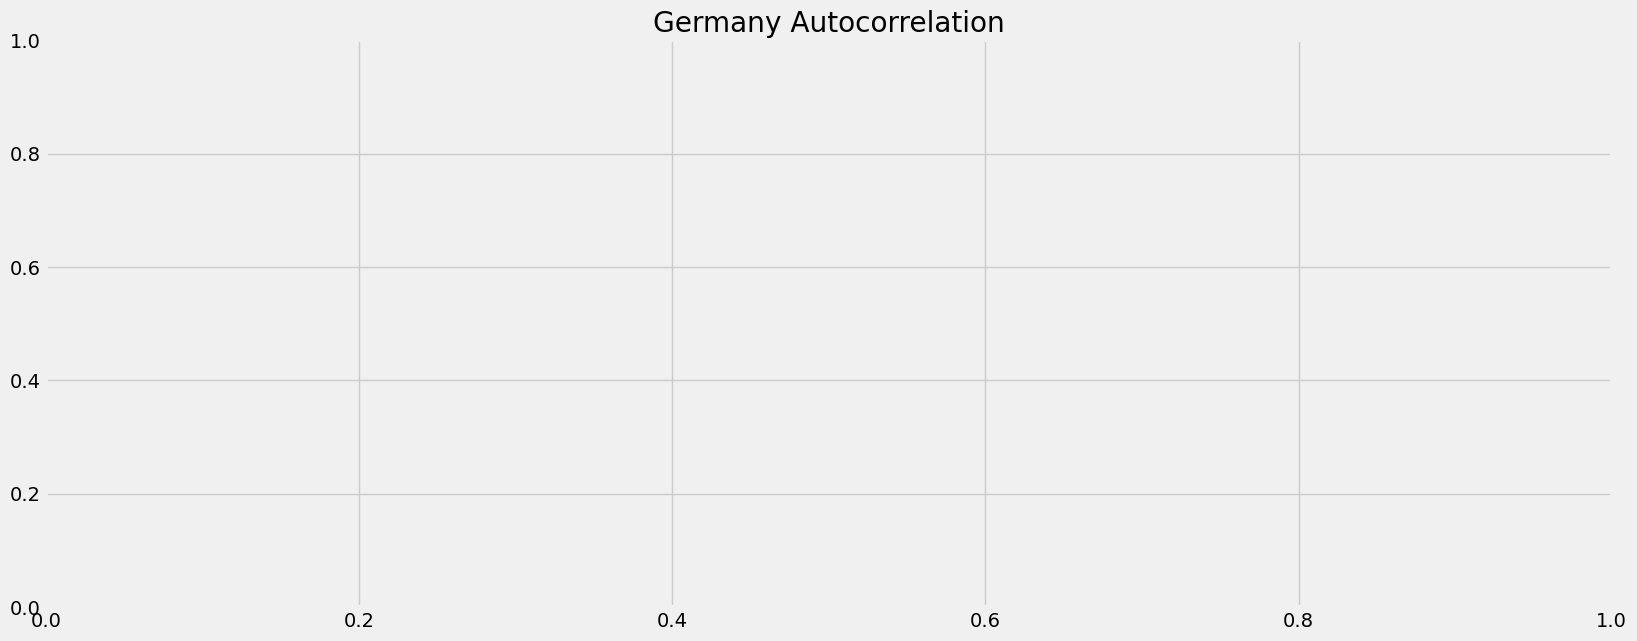

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub)
plt.show()
plt.title('Germany Autocorrelation')
plt.savefig(os.path.join(path1, 'Germany_AutoCorrl'),bbox_inches='tight', pad_inches=0.1)

**Romania**

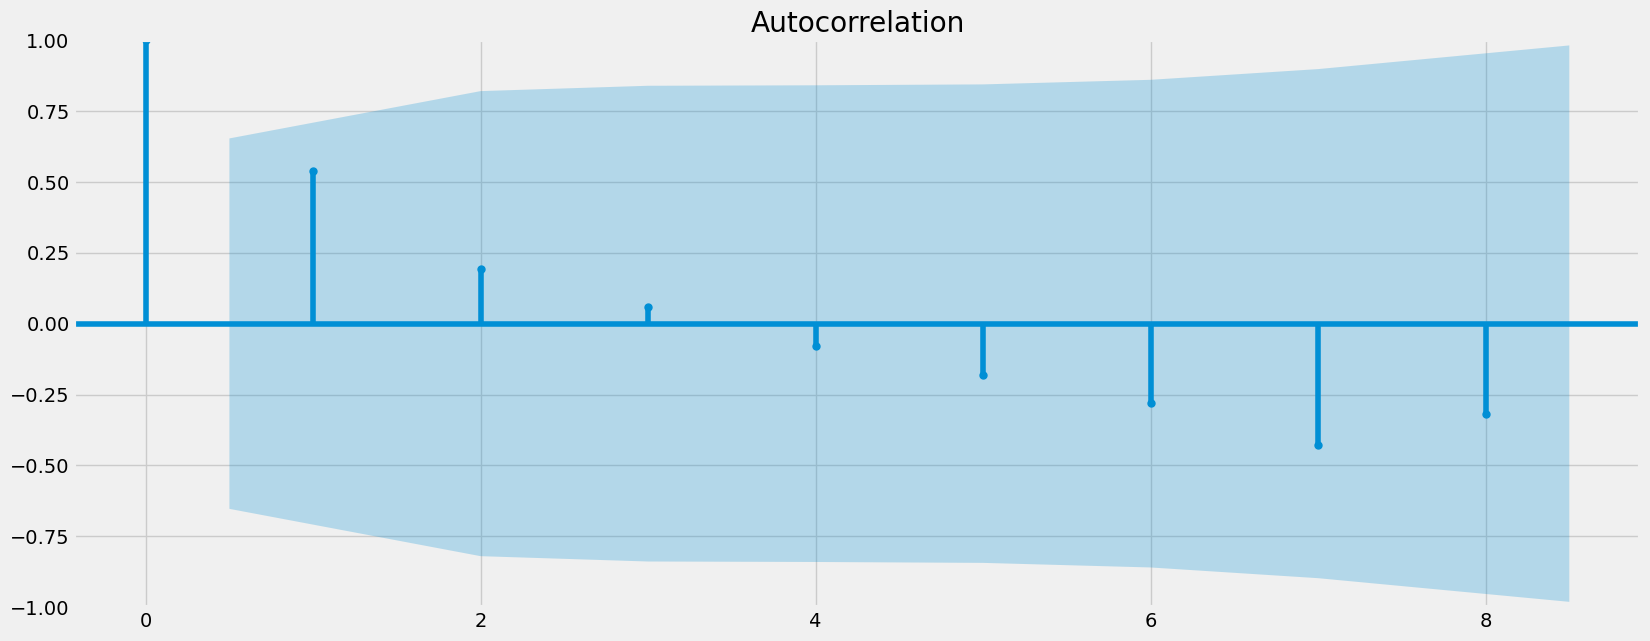

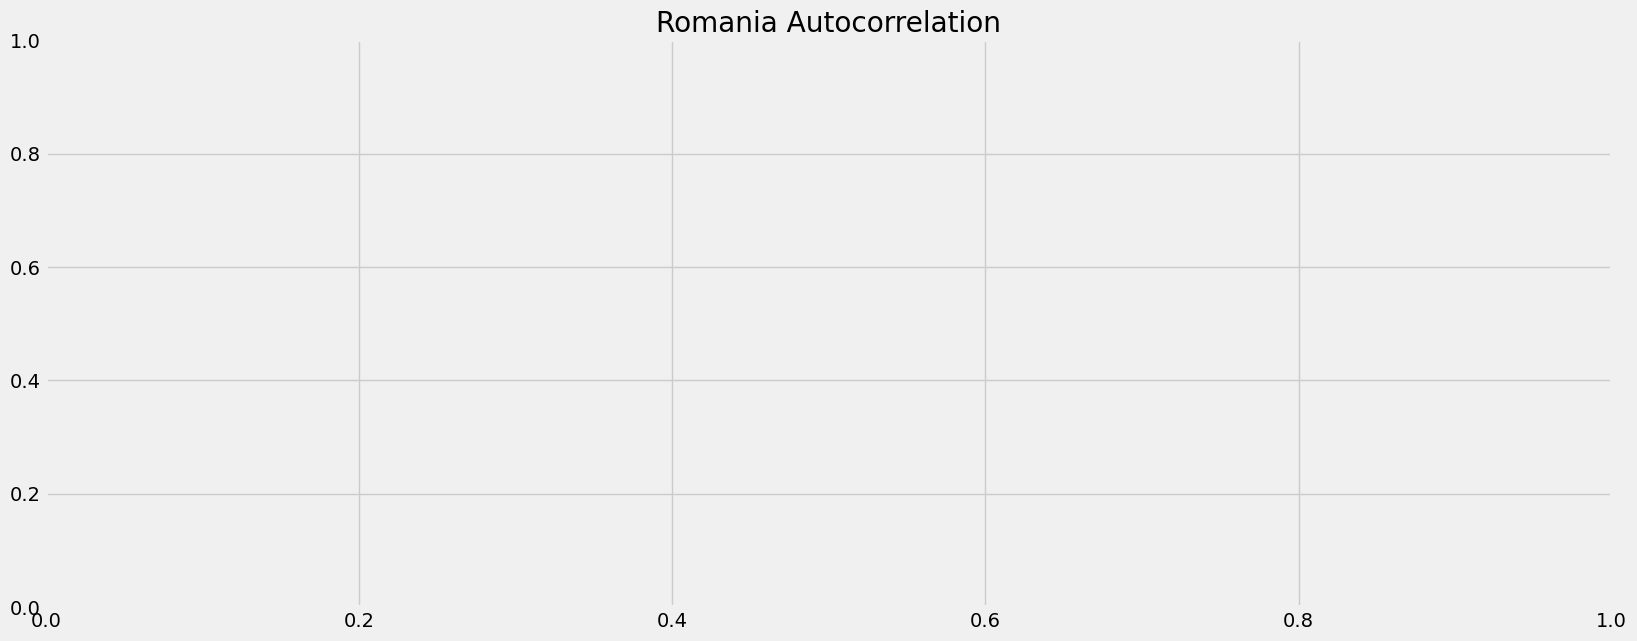

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub1)
plt.show()
plt.title('Romania Autocorrelation')
plt.savefig(os.path.join(path1, 'Romania_AutoCorrl'),bbox_inches='tight', pad_inches=0.1)

#### Deriving new columns

In [25]:
# Count and create total annual average
df['avg_annual'] = df.groupby('year')['happiness_score'].transform('mean')
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,avg_annual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,133,4.178571,Not happy,5.544441
1362,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,134,3.630689,Not happy,5.544441
1363,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,135,4.142600,Not happy,5.544441
1364,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,136,4.494500,Not happy,5.544441


In [26]:
# Count and create regional annual average
df['avg_annual_region'] = df.groupby(['year', 'region'])['happiness_score'].transform('mean')
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,avg_annual,avg_annual_region
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734,6.689619
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734,6.689619
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734,6.689619
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734,6.689619
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734,7.279000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,133,4.178571,Not happy,5.544441,4.382485
1362,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,134,3.630689,Not happy,5.544441,4.382485
1363,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,135,4.142600,Not happy,5.544441,4.382485
1364,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,136,4.494500,Not happy,5.544441,5.117077


In [27]:
df['region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia', 'Africa'], dtype=object)

In [28]:
df[df['country'] == 'Cyprus']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,avg_annual,avg_annual_region
66,Cyprus,Western Europe,5.689,1.208130,0.893180,0.923560,0.406720,0.306380,0.061460,2015,67,5.904545,Moderately happy,5.375734,6.689619
226,Cyprus,Western Europe,5.546,1.318570,0.706970,0.848800,0.295070,0.279060,0.052280,2016,69,5.904545,Moderately happy,5.382185,6.685667
379,Cyprus,Western Europe,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,2017,65,5.904545,Moderately happy,5.354019,6.703714
527,Cyprus,Western Europe,5.835,1.229000,1.211000,0.909000,0.495000,0.179000,0.154000,2018,58,5.904545,Moderately happy,5.375917,6.781762
530,Cyprus,Western Europe,5.762,1.229000,1.191000,0.909000,0.423000,0.202000,0.035000,2018,61,5.904545,Moderately happy,5.375917,6.781762
674,Cyprus,Western Europe,6.046,1.263000,1.223000,1.042000,0.406000,0.190000,0.041000,2019,49,5.904545,Moderately happy,5.407096,6.842190
689,Cyprus,Western Europe,5.718,1.263000,1.252000,1.042000,0.417000,0.191000,0.162000,2019,64,5.904545,Moderately happy,5.407096,6.842190
826,Cyprus,Western Europe,6.159,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2020,45,5.904545,Moderately happy,5.473240,6.899219
973,Cyprus,Western Europe,6.223,1.377000,0.765000,0.801000,0.464000,0.178000,0.061000,2021,39,5.904545,Moderately happy,5.532839,6.914905
1124,Cyprus,Western Europe,6.221,1.815000,0.909000,0.819000,0.448000,0.123000,0.062000,2022,41,5.904545,Moderately happy,5.553575,6.895667


In [29]:
df[df['region'] == 'Commonwealth of Independent States']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,avg_annual,avg_annual_region
43,Uzbekistan,Commonwealth of Independent States,6.0030,0.632440,1.340430,0.597720,0.658210,0.228370,0.308260,2015,44,6.082733,Happy,5.375734,5.49560
53,Kazakhstan,Commonwealth of Independent States,5.8550,1.122540,1.122410,0.643680,0.516490,0.118270,0.084540,2015,54,5.975544,Moderately happy,5.375734,5.49560
69,Turkmenistan,Commonwealth of Independent States,5.5480,0.958470,1.226680,0.538860,0.476100,0.169790,0.308440,2015,70,5.446263,Moderately happy,5.375734,5.49560
76,Kyrgyzstan,Commonwealth of Independent States,5.2860,0.474280,1.151150,0.650880,0.434770,0.300300,0.042320,2015,77,5.422833,Moderately happy,5.375734,5.49560
105,Tajikistan,Commonwealth of Independent States,4.7860,0.390470,0.855630,0.573790,0.472160,0.229740,0.150720,2015,106,5.246411,Moderately happy,5.375734,5.49560
206,Uzbekistan,Commonwealth of Independent States,5.9870,0.735910,1.168100,0.501630,0.608480,0.343260,0.283330,2016,49,6.082733,Happy,5.382185,5.54900
211,Kazakhstan,Commonwealth of Independent States,5.9190,1.229430,0.955440,0.573860,0.405200,0.150110,0.111320,2016,54,5.975544,Moderately happy,5.382185,5.54900
222,Turkmenistan,Commonwealth of Independent States,5.6580,1.080170,1.038170,0.440060,0.374080,0.225670,0.284670,2016,65,5.446263,Moderately happy,5.382185,5.54900
242,Kyrgyzstan,Commonwealth of Independent States,5.1850,0.560440,0.954340,0.554490,0.402120,0.384320,0.047620,2016,85,5.422833,Moderately happy,5.382185,5.54900
257,Tajikistan,Commonwealth of Independent States,4.9960,0.488350,0.756020,0.531190,0.434080,0.259980,0.135090,2016,100,5.246411,Moderately happy,5.382185,5.54900


#### Create a time series for annual average Happiness

In [30]:
# Create a subset 
sub2 = df[['year', 'avg_annual']]
sub2

,year,avg_annual
0,2015,5.375734
1,2015,5.375734
2,2015,5.375734
3,2015,5.375734
4,2015,5.375734
...,...,...
1361,2023,5.544441
1362,2023,5.544441
1363,2023,5.544441
1364,2023,5.544441


In [31]:
# Reset the index
sub2 = sub2.reset_index()
sub2

,index,year,avg_annual
0,0,2015,5.375734
1,1,2015,5.375734
2,2,2015,5.375734
3,3,2015,5.375734
4,4,2015,5.375734
...,...,...,...
1361,1361,2023,5.544441
1362,1362,2023,5.544441
1363,1363,2023,5.544441
1364,1364,2023,5.544441


In [32]:
sub2 = sub2.set_index('year')
sub2

,index,avg_annual
year,,
2015,0,5.375734
2015,1,5.375734
2015,2,5.375734
2015,3,5.375734
2015,4,5.375734
...,...,...
2023,1361,5.544441
2023,1362,5.544441
2023,1363,5.544441


In [33]:
sub2

,index,avg_annual
year,,
2015,0,5.375734
2015,1,5.375734
2015,2,5.375734
2015,3,5.375734
2015,4,5.375734
...,...,...
2023,1361,5.544441
2023,1362,5.544441
2023,1363,5.544441


In [34]:
# Drop unnecessary columns
sub2 = sub2.drop(columns = ['index'])
sub2

,avg_annual
year,
2015,5.375734
2015,5.375734
2015,5.375734
2015,5.375734
2015,5.375734
...,...
2023,5.544441
2023,5.544441
2023,5.544441


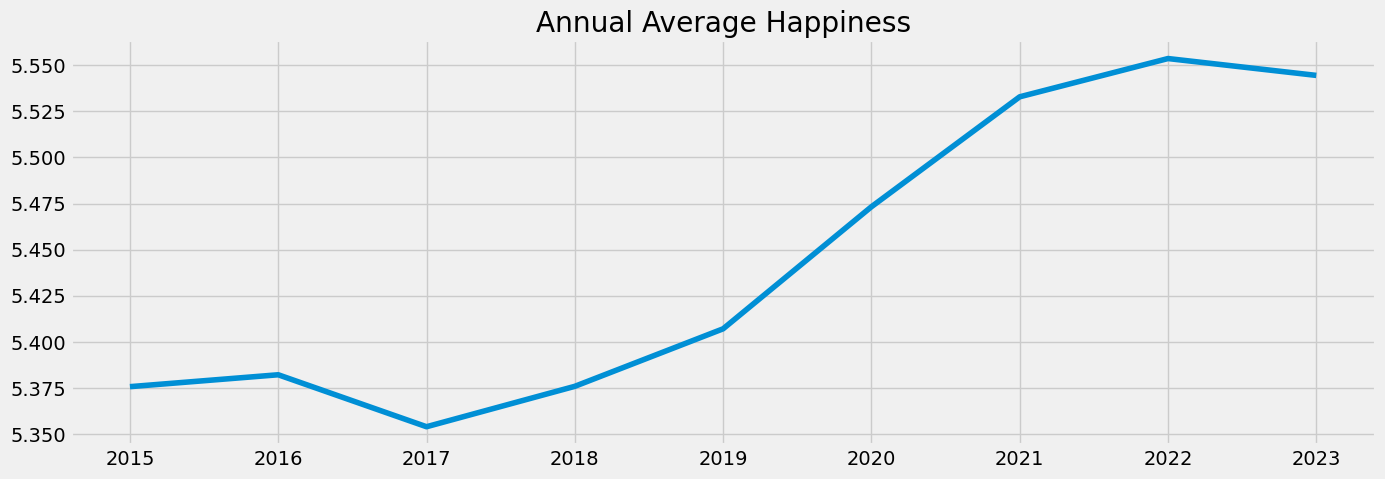

In [35]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub2)
plt.title('Annual Average Happiness')
plt.savefig(os.path.join(path1, 'Annual_Happiness'),bbox_inches='tight', pad_inches=0.1)

#### Export data

In [36]:
# Export the df as a csv file
df.to_csv(os.path.join(path, '2015-2023.csv'))